<a href="https://colab.research.google.com/github/covici19/RescueLink/blob/main/CASSINI_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install networkx

In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [ ]:
pip install osmnx

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Obtain OSM data for Vatican City
city_name = "Kyiv, Ukraine"
graph = ox.graph_from_place(city_name, network_type="all")

# Check if the graph is strongly connected
if not nx.is_strongly_connected(graph):
    # Find the largest connected component
    largest_component = max(nx.strongly_connected_components(graph), key=len)
    graph = graph.subgraph(largest_component)

noOfNodes = 0
shelterNodeList = []
for node in graph.nodes:
  noOfNodes += 1
print(noOfNodes, " nodes")

In [ ]:
# Coordinates for Point 1 (Threat)
lat1, lon1 = 50.4501, 30.7304

# Coordinates for Point 2 (Location)
lat2, lon2 = 50.4501, 30.5234

noOfShelters = 20

Shelter Indexes [82329, 13342, 68719, 17262, 88748, 133998, 14132, 32201, 72095, 122954, 65200, 111172, 3341, 24551, 73797, 2255, 103069, 136560, 111146, 72583]
Shelter Nodes [256554582, 267411641, 945480360, 1082268990, 1257735720, 1502836495, 1749617577, 3716639062, 3788873328, 4030189109, 4060554672, 4157893228, 4543160487, 4886569918, 5923326236, 7040838313, 7042117482, 8615037411, 10016543748, 10594497065]
Shelter Coordinates [[30.5323013, 50.4525283], [30.6304928, 50.4331337], [30.4719787, 50.4508715], [30.5166681, 50.4248448], [30.4572837, 50.38183], [30.5115362, 50.4465335], [30.5896215, 50.3729706], [30.5264375, 50.4126532], [30.5983386, 50.4905655], [30.6264224, 50.4183591], [30.4085261, 50.4094203], [30.4600568, 50.4358245], [30.4515612, 50.426285], [30.5216476, 50.5086412], [30.617953, 50.4351978], [30.6910336, 50.3981217], [30.4583762, 50.3924919], [30.619456, 50.4337129], [30.4949956, 50.3376617], [30.4271312, 50.5115134]]
min distance =  927.3639999999999


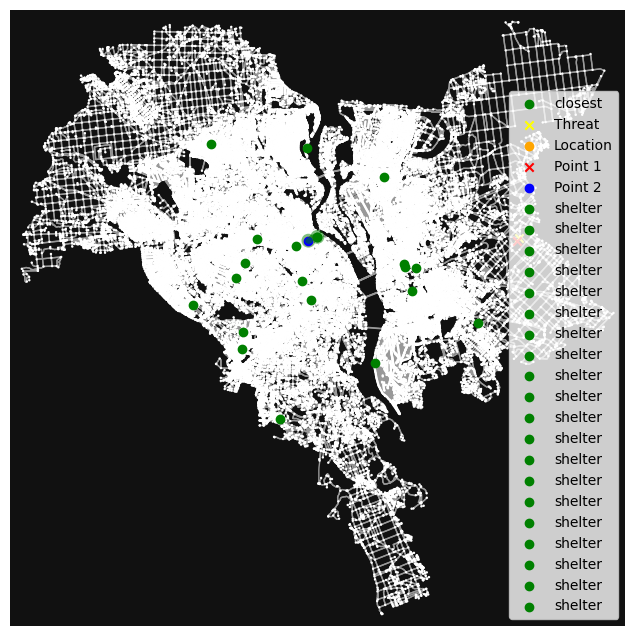

In [ ]:

shelterIndexList = random.sample(range(0, noOfNodes), noOfShelters)
print("Shelter Indexes", shelterIndexList)

shelterNodeList = []
i = 0
for node in graph.nodes:
  if i in shelterIndexList:
    shelterNodeList.append(node)
  i += 1
print("Shelter Nodes", shelterNodeList)

shelterCoordinatesList = []
for node in shelterNodeList:
  x, y = graph.nodes[node]['x'], graph.nodes[node]['y']
  shelterCoordinatesList.append([x, y])
print("Shelter Coordinates", shelterCoordinatesList)


# Find the nearest network node to the first point (Point 1)
nearest_node_threat = ox.distance.nearest_nodes(graph, lon1, lat1)

# Find the nearest network node to the second point (Point 2)
nearest_node_location = ox.distance.nearest_nodes(graph, lon2, lat2)

# Get the coordinates of the nearest nodes
x1, y1 = graph.nodes[nearest_node_threat]['x'], graph.nodes[nearest_node_threat]['y']
x2, y2 = graph.nodes[nearest_node_location]['x'], graph.nodes[nearest_node_location]['y']

# Find the closest node from the yellow "Threat" node
closest_node = None
min_distance = 1000000

for node in shelterNodeList:
    distance = nx.shortest_path_length(graph, nearest_node_location, node, weight="length")
    if distance < min_distance:
        min_distance = distance
        closest_node = node

print("min distance = ", min_distance)

# Get the coordinates of the closest node
x_closest, y_closest = graph.nodes[closest_node]['x'], graph.nodes[closest_node]['y']

# Calculate the shortest route between the yellow "Threat" node and the closest node
route_to_closest = nx.shortest_path(graph, nearest_node_location, closest_node, weight="length")

# Plot the graph with the route from the yellow "Threat" node to the closest node
fig, ax = ox.plot_graph_route(graph, route_to_closest, node_size=3, show=False, close=False, route_color='g')

ax.scatter(x_closest, y_closest, color='green', label='closest', marker='o')

ax.scatter(x1, y1, color='yellow', label='Threat', marker='x')
ax.scatter(x2, y2, color='orange', label='Location', marker='o')

ax.scatter(lon1, lat1, color='red', label='Point 1', marker='x')
ax.scatter(lon2, lat2, color='blue', label='Point 2', marker='o')

for shelter in shelterCoordinatesList:
  ax.scatter(shelter[0], shelter[1], color='green', label='shelter', marker='o')

# Show the plot
# plt.legend()
plt.show()
